In [1]:
import os
from concurrent.futures import as_completed, ProcessPoolExecutor, ThreadPoolExecutor

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import fft
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def load_img_with_features(filepath, label):
    img = cv2.imread(filepath)
    gray_img = to_gray(img)
    features = np.abs(fft.fft2(gray_img)).flatten()
    return features, label


def load_imgs_from_directory(directory, label, num_images=None):
    images = []
    labels = []
    files = os.listdir(directory)
    if num_images is not None:
        files = files[:num_images]
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(load_img_with_features, os.path.join(directory, filename), label) for filename
                   in files]
        for future in as_completed(futures):
            features, lbl = future.result()
            images.append(features)
            labels.append(lbl)
    return images, labels


fake_dir ="E:\zipp\college\Third Year\\5th Sem\ML\ML\Lab 3\\train\FAKE"
real_dir = "E:\zipp\college\Third Year\\5th Sem\ML\ML\Lab 3\\train\REAL"


num_images_to_load = 10000

fake_images, fake_labels = load_imgs_from_directory(fake_dir, 0, num_images=num_images_to_load)
real_images, real_labels = load_imgs_from_directory(real_dir, 1, num_images=num_images_to_load)

features = np.vstack((fake_images, real_images))
labels = np.concatenate((fake_labels, real_labels))


C:\Users\soumi\AppData\Local\Temp\ipykernel_22612\2639891595.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
real_images_mean_feat_vec = np.mean(real_images, axis=0)
real_images_std_feat_vec = np.std(real_images, axis=0)
fake_images_mean_feat_vec = np.mean(fake_images, axis=0)
fake_images_std_feat_vec = np.std(fake_images, axis=0)

distance_between_mean_vecs = np.linalg.norm(real_images_mean_feat_vec - fake_images_mean_feat_vec)

data = {
    "Real Images Mean Feature Vector": real_images_mean_feat_vec,
    "Fake Images Mean Feature Vector": fake_images_mean_feat_vec,
    "Real Images Std Feature Vector": real_images_std_feat_vec,
    "Fake Images Std Feature Vector": fake_images_std_feat_vec,
}

df_a1_1 = pd.DataFrame(data).T
display(df_a1_1)
df_a1_2 = pd.DataFrame({"Mean Feat. Vec. Dist": [distance_between_mean_vecs]})
display(df_a1_2)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
Real Images Mean Feature Vector,125881.484400,10538.498436,5397.240666,3515.274074,2621.915756,2057.916195,1664.463697,1409.662730,1202.606904,1035.133265,...,711.019850,827.980481,970.342996,1142.692907,1361.259500,1673.369540,2122.933584,2835.590149,4106.312103,7053.472711
Fake Images Mean Feature Vector,114909.178000,9529.360191,5163.091346,3353.632039,2480.073506,1956.583532,1623.610047,1374.603817,1170.048180,1009.086813,...,723.832064,831.430198,962.413933,1144.183215,1343.488743,1639.435238,2060.588996,2729.711033,3902.928612,6700.419024
Real Images Std Feature Vector,32132.160281,7143.788449,3748.440424,2426.588727,1820.644913,1423.480304,1169.071896,1004.100137,851.570240,748.304693,...,469.918855,545.071719,636.451632,753.268847,890.320213,1095.387899,1396.533357,1871.728994,2733.768215,4598.471309
Fake Images Std Feature Vector,21085.751338,6471.749457,3919.527348,2593.189758,1842.375102,1472.987416,1211.750504,1030.371631,870.803272,760.852831,...,504.559405,595.299616,682.875352,837.522359,976.129058,1185.111949,1526.821120,2019.918913,2894.928035,4615.257294


,Mean Feat. Vec. Dist
0,11860.345775


,r,dist
1,1,656672.344743
2,2,42788.043690
3,3,22346.114824
4,4,17651.309612
5,5,15833.289737
6,6,14915.112528
7,7,14369.539042
8,8,14010.160841
9,9,13756.851090
10,10,13569.724339


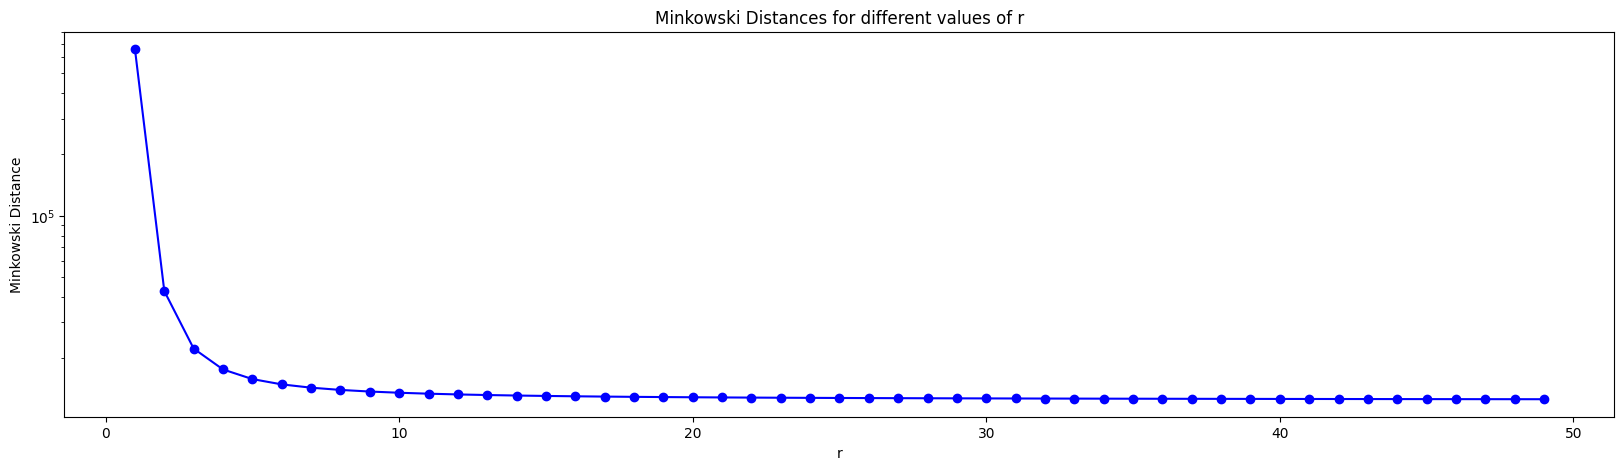

In [3]:
from scipy.spatial.distance import minkowski

data = {"r": [], "dist": []}
v1, v2 = features[0], features[1]

for i in range(1, 50):
    data["r"].append(i)
    data["dist"].append(minkowski(v1, v2, i))

data = pd.DataFrame(data, index=data["r"])

display(data)

plt.figure(figsize=(20, 5))
plt.xlabel("r")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distances for different values of r")
plt.plot(data["r"], data["dist"], marker='o', linestyle='-', color='b')
plt.yscale("log")
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=32)

In [5]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [6]:
accuracy = knn.score(X_test, y_test)
print("Test Accuracy:", accuracy)

training_accuracy = knn.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy}")

Test Accuracy: 0.65175
Training Accuracy: 0.82825


In [7]:
predictions = knn.predict(X_test[:20])
actual_labels = y_test[:20]

predicted_vs_actual = pd.DataFrame({"Actual": actual_labels, "Predicted": predictions})

predicted_vs_actual.index += 1
predicted_vs_actual.index.name = "Observation"
predicted_vs_actual.T

Observation,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Actual,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,0
Predicted,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

k_values = range(1, 50)
accuracies = []
precisions = []
recalls = []
f1_scores = []

training_accuracies = []

for k in k_values:
    print(f"k:\t{k}")
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=8)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tc = knn.score(X_train, y_train)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    training_accuracies.append(tc)
accuracies_df = pd.DataFrame(
    {"K-Value": k_values, "Test Accuracy": accuracies, "Training Accuracy": training_accuracies, "Precision":
        precisions, "Recall": recalls, "F1- Score": f1_scores},
    index=k_values)

k:	1
k:	2
k:	3
k:	4
k:	5
k:	6
k:	7
k:	8
k:	9
k:	10
k:	11
k:	12
k:	13
k:	14
k:	15
k:	16
k:	17
k:	18
k:	19
k:	20
k:	21
k:	22
k:	23
k:	24
k:	25
k:	26
k:	27
k:	28
k:	29
k:	30
k:	31
k:	32
k:	33
k:	34
k:	35
k:	36
k:	37
k:	38
k:	39
k:	40
k:	41
k:	42
k:	43
k:	44
k:	45
k:	46
k:	47
k:	48
k:	49


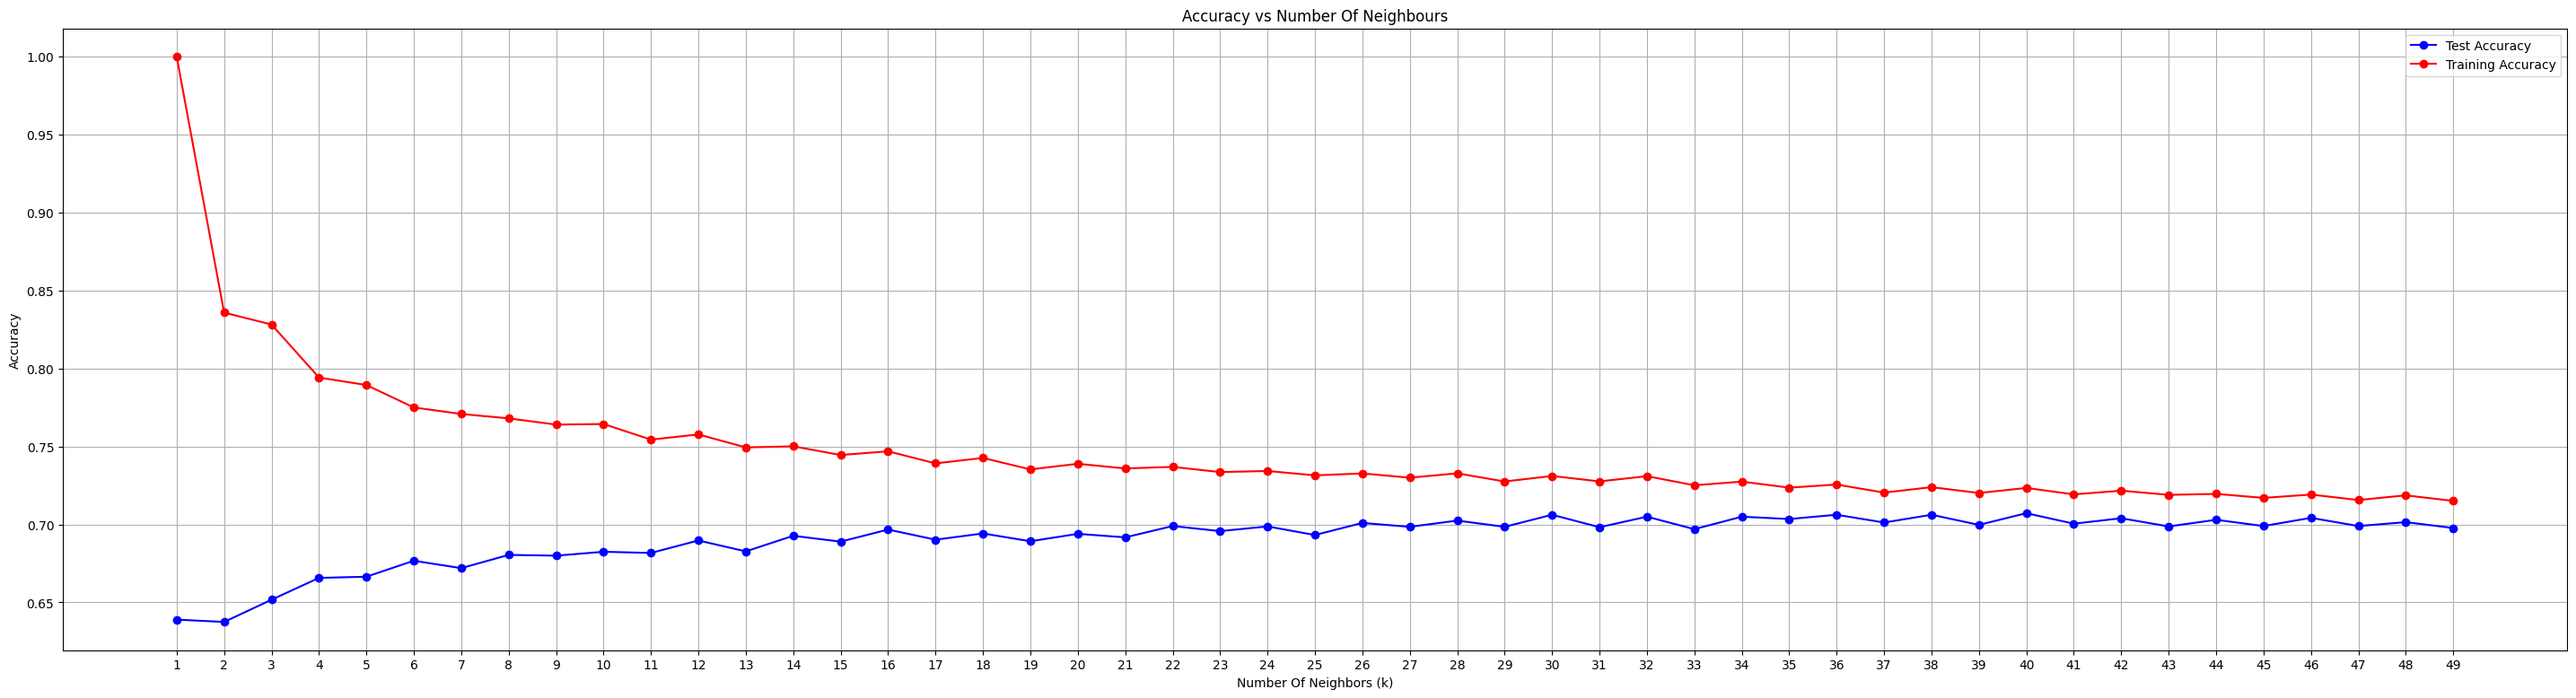

,K-Value,Test Accuracy,Training Accuracy,Precision,Recall,F1- Score,Accuracy Difference
1,1,0.63900,1.000000,0.625993,0.675240,0.649685,0.361000
2,2,0.63750,0.835875,0.700829,0.468986,0.561934,0.198375
3,3,0.65175,0.828250,0.636827,0.692385,0.663445,0.176500
4,4,0.66575,0.794250,0.702128,0.565809,0.626641,0.128500
5,5,0.66650,0.789438,0.647701,0.717600,0.680861,0.122938
6,6,0.67675,0.775062,0.690819,0.629854,0.658929,0.098313
7,7,0.67200,0.770875,0.650112,0.732728,0.688952,0.098875
8,8,0.68050,0.768062,0.685429,0.657085,0.670958,0.087562
9,9,0.68000,0.764062,0.657130,0.741301,0.696682,0.084062
10,10,0.68250,0.764437,0.680873,0.676752,0.678806,0.081937


In [9]:

accuracy_diff = [abs(i - j) for i, j in zip(accuracies, training_accuracies)]
accuracies_df["Accuracy     Difference"] = accuracy_diff

plt.figure(figsize=(36, 9))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Test Accuracy")
plt.plot(k_values, training_accuracies, marker='o', linestyle='-', color='r', label="Training Accuracy")
plt.title('Accuracy vs Number Of Neighbours')
plt.xlabel('Number Of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

accuracies_df

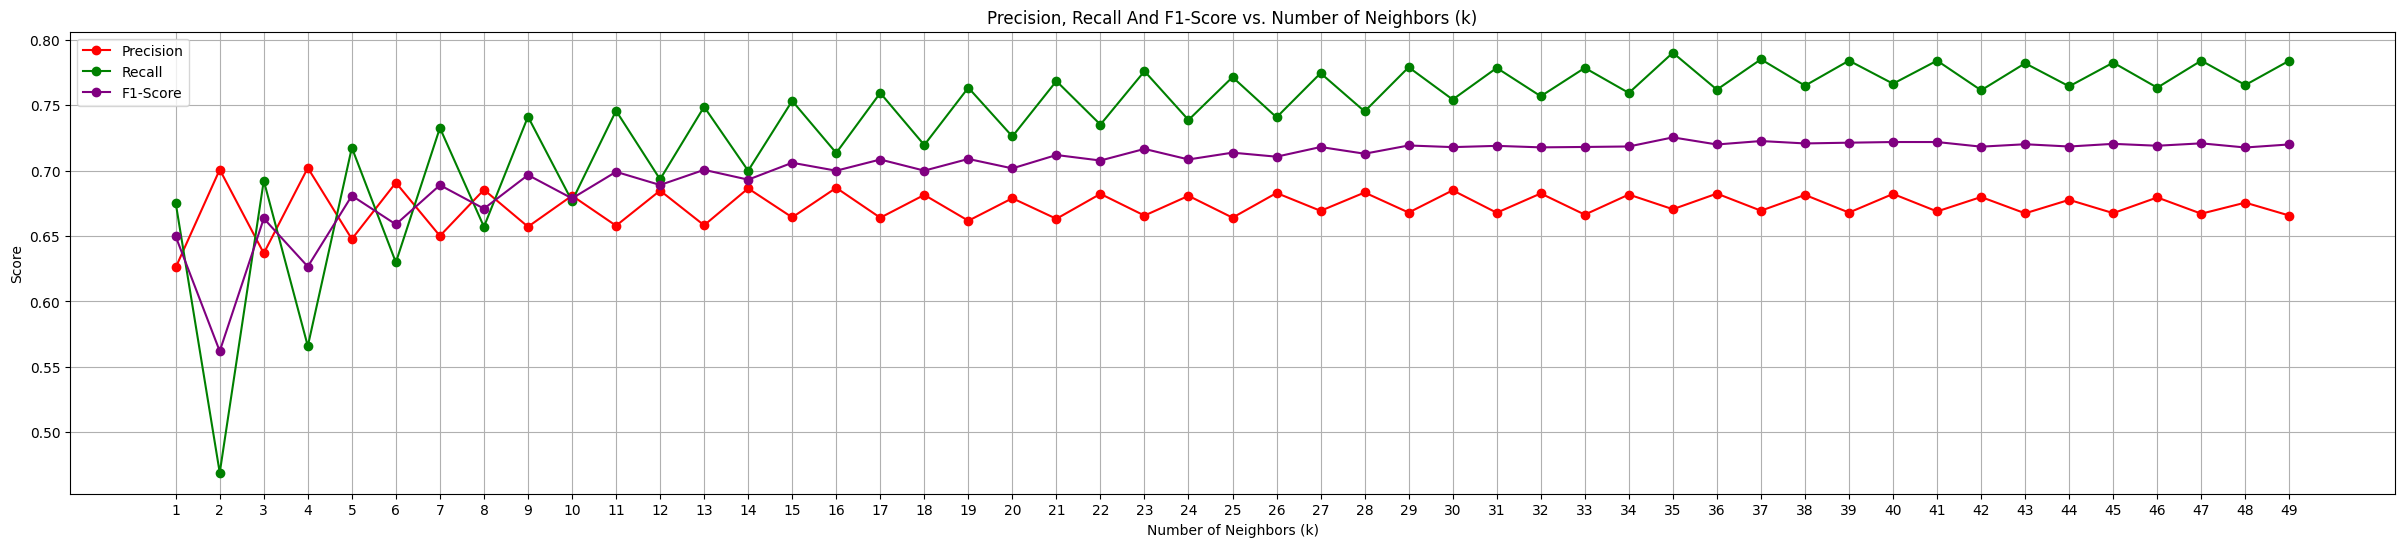

In [10]:
plt.figure(figsize=(30, 6))
plt.plot(k_values, precisions, marker='o', linestyle='-', color='r', label='Precision')
plt.plot(k_values, recalls, marker='o', linestyle='-', color='g', label='Recall')
plt.plot(k_values, f1_scores, marker='o', linestyle='-', color='purple', label='F1-Score')

plt.title('Precision, Recall And F1-Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

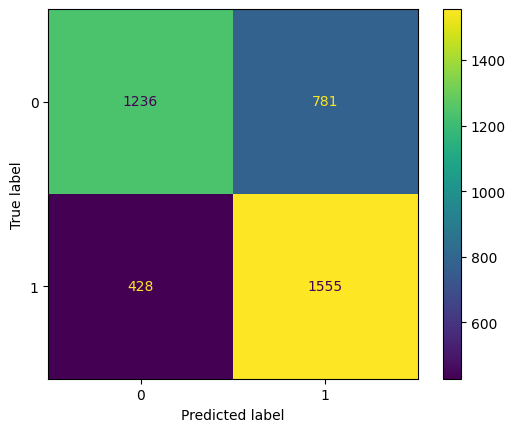

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=[0, 1])

# conf_mat.plot()   


In [12]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10, n_jobs=-1, scoring='precision')
print(cross_val_scores)

print(f"Mean precision cross-validation score:\t{cross_val_scores.mean()}")

[0.66157205 0.66666667 0.65911432 0.66311301 0.67838126 0.66813671
 0.66211962 0.67872807 0.67197452 0.65851172]
Mean precision cross-validation score:	0.6668317949149148


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)

In [15]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score

In [16]:
print(y_train_pred)
print(y_train)

[ 0.28824302  0.6373787   0.29655383 ... -0.02915839  0.45883114
  0.62015455]
[0 1 0 ... 0 0 1]


In [17]:

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error (MSE) on training data:\t{mse_train}")
print(f"Root Mean Squared Error (RMSE) on training data:\t{rmse_train}")
print(f"Mean Absolute Percentage Error (MAPE) on training data:\t{mape_train}")
print(f"R^2 Score on training data:\t{r2_train}")

Mean Squared Error (MSE) on training data:	0.14922315218882864
Root Mean Squared Error (RMSE) on training data:	0.3862941265264444
Mean Absolute Percentage Error (MAPE) on training data:	791707444592785.8
R^2 Score on training data:	0.40310469588932785
